## Experimentation file for Genre Classification:
By
Ashlesha Shinde,
Chhavi Sharma,
Prahasan Gadugu,
Supriya Ayalur Balasubramanian.

####Code Citations:

https://developers.google.com/machine-learning/guides/text-classification/step-4 - 1 Oct 2018, Google Team

https://github.com/rasbt/musicmood - Sebastian Raschka - 1 November 2016

https://github.com/AnuragDharNEU/AdvancedDataScience/tree/master/Song_Mood_Classifier_Flask_Heroku - Anurag Dhar - 8 April 2019

https://github.com/google/eng-edu/tree/master/ml/guides/text_classification - Pavith Rasav 17 July 2018

##Data Preparation

In [0]:
#Importing all the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.simplefilter("ignore")

genre_model_accuracies=[]
genre_model_name=[]
genre_tfidf_model_accu=[]
genre_tfidf_model_name=[]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
lyrics_mod_sample = pd.read_csv("train_cleaned_lyrics.tsv",sep="\t",encoding='utf-8')
print(lyrics_mod_sample.shape)
X_train, X_valid, y_train, y_valid = train_test_split(lyrics_mod_sample["Cleaned_lyric"], lyrics_mod_sample["genre"], test_size=0.2, random_state=42)
lyrics_mod_sample.dropna(inplace = True)
print(lyrics_mod_sample.shape)

(20217, 7)
(20176, 7)


Text(0, 0.5, 'Number of samples')

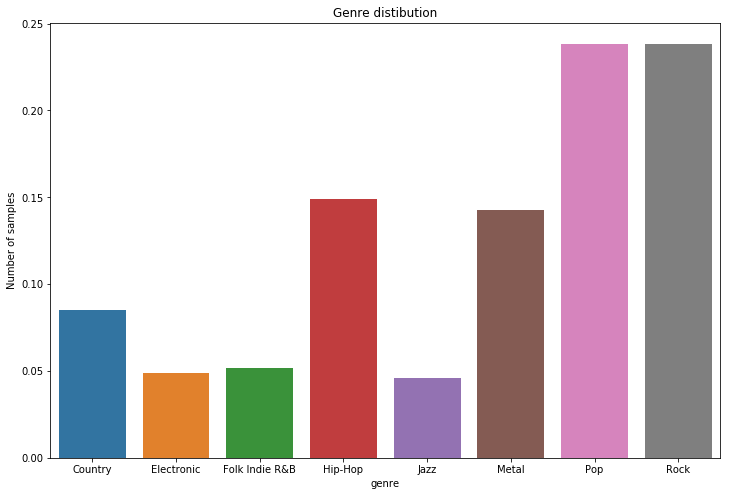

In [0]:
plot_imbal_labels = lyrics_mod_sample.groupby(["genre"]).size()
plot_imbal_labels = plot_imbal_labels / plot_imbal_labels.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(plot_imbal_labels.keys(), plot_imbal_labels.values).set_title("Genre distibution")
ax.set_ylabel('Number of samples')

In [0]:
Rock_lyrics = ' '.join(lyrics_mod_sample.loc[lyrics_mod_sample.genre == 'Rock', 'Cleaned_lyric'].values)
Pop_lyrics = ' '.join(lyrics_mod_sample.loc[lyrics_mod_sample.genre == 'Pop', 'Cleaned_lyric'].values)
Metal_lyrics = ' '.join(lyrics_mod_sample.loc[lyrics_mod_sample.genre == 'Metal', 'Cleaned_lyric'].values)
import wordcloud
from wordcloud import WordCloud

(-0.5, 799.5, 499.5, -0.5)

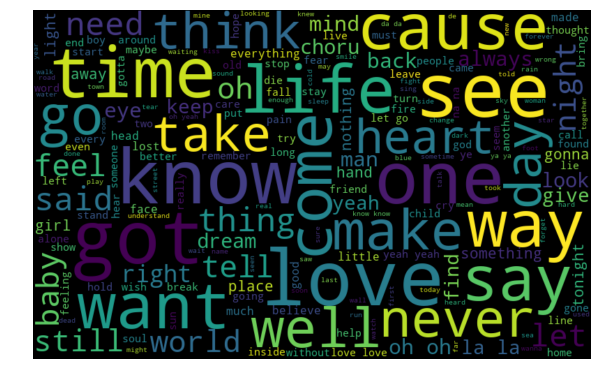

In [0]:
wordcloud_rock = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Rock_lyrics)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_rock, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

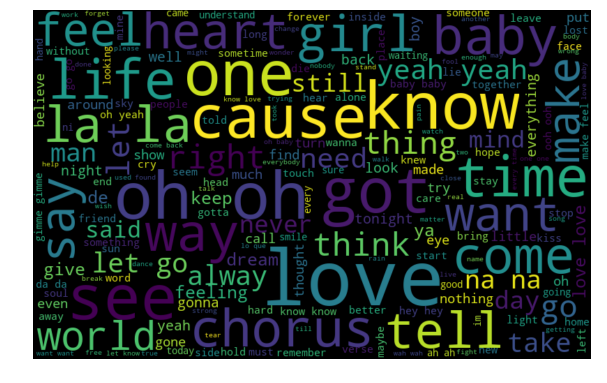

In [0]:
wordcloud_pop = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Pop_lyrics)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pop, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

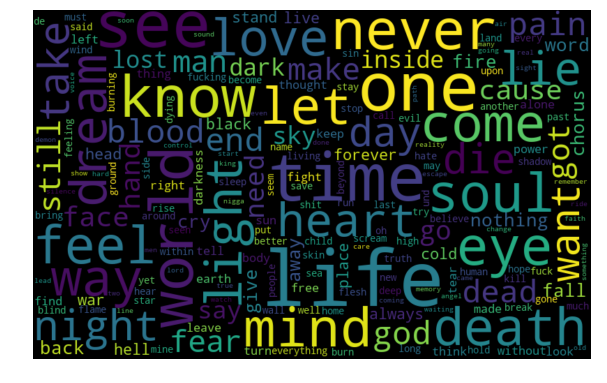

In [0]:
wordcloud_metal = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Metal_lyrics)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_metal, interpolation="bilinear")
plt.axis('off')

In [0]:
'''
We are checking no. of words per samples to no. of sample ratio as 
criteria to create our model using n-gram approach or sequence approach. 
If s_w_ratio>1500, sequence approach otherwise n-gram.

'''


def get_num_words_per_sample(sample_texts):
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

number_of_words_per_sample = get_num_words_per_sample(lyrics_mod_sample['Cleaned_lyric'])
no_of_samples = lyrics_mod_sample.shape[0]


s_w_ratio  = no_of_samples/number_of_words_per_sample
print(s_w_ratio)

203.7979797979798


##Baseline Models

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10)

X_train_bow = cv.fit_transform(X_train.values.astype('U')).toarray()
X_valid_bow = cv.fit_transform(X_valid.values.astype('U')).toarray()

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(
						 penalty='l2', 
						 C=0.5		
						 )

from sklearn.metrics import accuracy_score
print("Training Logistic regression ...............")
log_reg_classifier.fit(X_train_bow, y_train)
y_valid_pred_log = log_reg_classifier.predict(X_valid_bow)
log_score = accuracy_score(y_valid,y_valid_pred_log)
print("Logistic Regression score", log_score*100)
genre_model_accuracies.append(log_score*100)
genre_model_name.append("Logistic Regression")

Training Logistic regression ...............
Logistic Regression score 34.69337289812067


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
classifier_mulnb = MultinomialNB()
print("Training...............")
classifier_mulnb.fit(X_train_bow, y_train)
y_valid_pred_mulnb = classifier_mulnb.predict(X_valid_bow)
mulnb_score = accuracy_score(y_valid,y_valid_pred_mulnb)
print("Multinomial Naive Bayes score", mulnb_score*100)
genre_model_accuracies.append(mulnb_score*100)
genre_model_name.append("Multinomial Naive Bayes")

Training...............
Multinomial Naive Bayes score 28.659742828882294


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
print("Training RF ...............")
rf_clf.fit(X_train_bow, y_train)
y_valid_pred_rf = rf_clf.predict(X_valid_bow)
rf_score = accuracy_score(y_valid,y_valid_pred_rf)
print("RF score", rf_score*100)
genre_model_accuracies.append(rf_score*100)
genre_model_name.append("Random Forest")

Training RF ...............
RF score 34.56973293768546


In [0]:
from sklearn.svm import LinearSVC
svm_clf =LinearSVC(
        C=1.0,
        class_weight='balanced',
        dual=False,
        fit_intercept=True,
        intercept_scaling=1,
        loss='squared_hinge',
        max_iter=1000,
        multi_class='ovr',
        penalty='l2',
        random_state=0,
        tol=1e-05, 
        verbose=0
    )

print("Training SVM ...............")
svm_clf.fit(X_train_bow, y_train)
y_valid_pred_svm = svm_clf.predict(X_valid_bow)
svm_score = accuracy_score(y_valid,y_valid_pred_svm)
print("Linear SVC", svm_score*100)
genre_model_accuracies.append(svm_score*100)
genre_model_name.append("Linear SVC")

Training SVM ...............
Linear SVC 32.987141444114734


##Implementing the Baseline Models with TF-IDF Vectorization

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

svc = LinearSVC(
    C=1.0,
    class_weight='balanced',
    dual=True,
    fit_intercept=True,
    intercept_scaling=1,
    loss='squared_hinge',
    max_iter=1000,
    multi_class='ovr',
    penalty='l2',
    random_state=0,
    tol=1e-05, 
    verbose=0
)

tfidf = TfidfVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    ngram_range=(1, 3),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
)

pipeline = Pipeline([
    ('tfidf', tfidf),
    ('svc', svc),
])


pipeline.fit(X_train.values.astype('U'),y_train)
y_valid_pred_lsvc = pipeline.predict(X_valid.values.astype('U'))

pip_score = accuracy_score(y_valid,y_valid_pred_lsvc)
print("Linear SVC with TF-IDF score", pip_score*100)
genre_tfidf_model_accu.append(pip_score*100)
genre_tfidf_model_name.append("Linear SVC with TF-IDF")

Linear SVC with TF-IDF score 48.590504451038576


In [0]:
#Logistic Regression with TF-IDF
pipeline_2 = Pipeline([
    ('tfidf', tfidf),
    ('logisticreg', log_reg_classifier),
])

pipeline_2.fit(X_train.values.astype('U'),y_train)
y_valid_pred_lr = pipeline_2.predict(X_valid.values.astype('U'))

pip_score_2 = accuracy_score(y_valid,y_valid_pred_lr)
print("Logistic Regression with TF-IDF score", pip_score_2*100)
genre_tfidf_model_accu.append(pip_score_2*100)
genre_tfidf_model_name.append("Logistic Regression with TF-IDF")

Logistic Regression with TF-IDF score 47.27992087042532


In [0]:
#Random Forest with TF-IDF
pipeline_3 = Pipeline([
    ('tfidf', tfidf),
    ('rf', rf_clf),
])
pipeline_3.fit(X_train.values.astype('U'),y_train)
y_valid_pred_rf = pipeline_3.predict(X_valid.values.astype('U'))

pipscore_3 = accuracy_score(y_valid,y_valid_pred_rf)
print("Random Forests with TF-IDF score", pipscore_3*100)
genre_tfidf_model_accu.append(pipscore_3*100)
genre_tfidf_model_name.append("Random Forest with TF-IDF")

Random Forests with TF-IDF score 29.797230464886248


In [0]:
genre_model_accuracies

[34.69337289812067, 28.659742828882294, 34.56973293768546, 32.987141444114734]

In [0]:
genre_model_name

['Logistic Regression',
 'Multinomial Naive Bayes',
 'Random Forest',
 'Linear SVC']

In [0]:
genre_tfidf_model_accu

[48.590504451038576, 47.27992087042532, 29.797230464886248]

In [0]:
genre_tfidf_model_name

['Linear SVC with TF-IDF',
 'Logistic Regression with TF-IDF',
 'Random Forest with TF-IDF']

##Plotting the accuracies for each model

[]

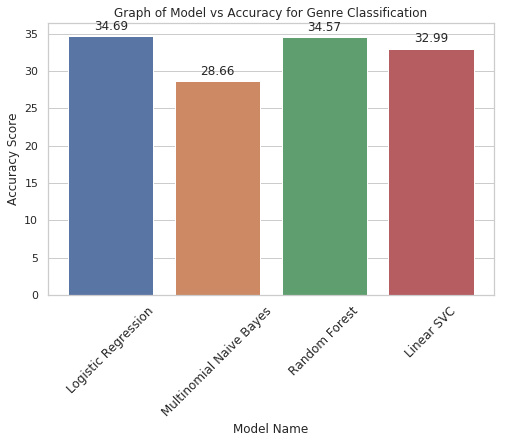

In [0]:
plt.figure(figsize=(8,5))
sns.set(style ="whitegrid")
ax=sns.barplot(x=genre_model_name, y=genre_model_accuracies)
ax.set(xlabel="Model Name", ylabel='Accuracy Score')
sns.set_style("ticks", {"xtick.major.size":10,"ytick.major.size":10})
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(fontsize=12, rotation=45)
plt.title('Graph of Model vs Accuracy for Genre Classification')
plt.plot()

[]

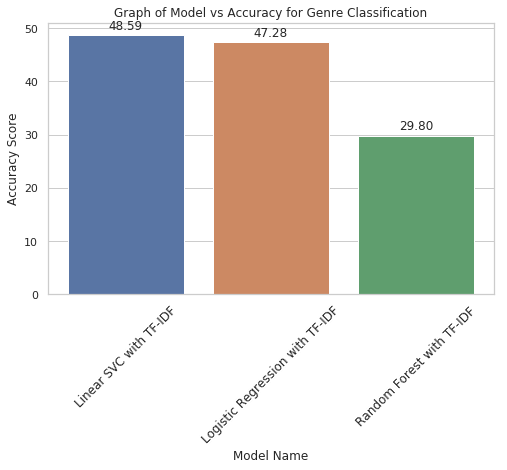

In [0]:
plt.figure(figsize=(8,5))
sns.set(style ="whitegrid")
ax=sns.barplot(x=genre_tfidf_model_name, y=genre_tfidf_model_accu)
ax.set(xlabel="Model Name", ylabel='Accuracy Score')
sns.set_style("ticks", {"xtick.major.size":10,"ytick.major.size":10})
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(fontsize=12, rotation=45)
plt.title('Graph of Model vs Accuracy for Genre Classification')
plt.plot()

##Implementing Deep Learning Techniques
###CNN Implementation

In [0]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.models import Sequential
from keras.layers import LSTM, Activation
from keras.layers import Input

Using TensorFlow backend.


In [0]:
#Word Embeddings with CNN:

lyricals = lyrics_mod_sample['Cleaned_lyric'].values
genres = lyrics_mod_sample['genre'].values
lyricals_train, lyricals_test, y_train, y_test = train_test_split(lyricals, genres, test_size=0.25, random_state=1000)

In [0]:
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

def max_length(lines):
	return max([len(s) for s in lines])

def encode_text(tokenizer, lines, length):
	encoded = tokenizer.texts_to_sequences(lines)
	padded = pad_sequences(encoded, maxlen=length, padding = 'post')
	return padded

In [0]:
tokenizer = create_tokenizer(lyricals_train)
length = max_length(lyricals_train)
vocab_size = len(tokenizer.word_index) + 1
train = encode_text(tokenizer, lyricals_train, length)
print(train.shape)
test = encode_text(tokenizer, lyricals_test, length)

(15132, 8448)


In [0]:
#One hot encoding of labels:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
train_values = array(y_train)
test_values = array(y_test)

label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(train_values)
integer_encoded_test = label_encoder.fit_transform(test_values)

onehot_encoder = OneHotEncoder(sparse=False)
train_labels = onehot_encoder.fit_transform(integer_encoded_train.reshape(len(integer_encoded_train), 1))
test_labels = onehot_encoder.fit_transform(integer_encoded_test.reshape(len(integer_encoded_test), 1))


In [0]:
#CNN Implementation:
model_cnn = Sequential()
model_cnn.add(InputLayer((length,)))
model_cnn.add(Activation('relu'))
model_cnn.add(Embedding(vocab_size, 100))
model_cnn.add(Conv1D(filters=100, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(MaxPooling1D(pool_size=3))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(8, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()
model_cnn.fit(train, train_labels, epochs=2, batch_size=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_1 (Activation)    (None, 8448)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 8448, 100)         7554400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8446, 100)         30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8446, 100)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2815, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)  

In [0]:
score_cnn = model_cnn.evaluate(test, test_labels, verbose=0)
print("Test Accuracy of CNN:",(score_cnn[1]*100),"%")
genre_model_accuracies.append((score_cnn[1]*100))
genre_model_name.append("CNN")

Test Accuracy of CNN: 38.183980969849515 %


### LSTM Implementation 
**This takes time please be patient.**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, 100, input_length=length))
model_rnn.add(LSTM(100, input_shape=(vocab_size, 100)))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(10, activation='relu'))
model_rnn.add(Dense(8, activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())
model_rnn.fit(train,train_labels,batch_size=100,epochs=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8448, 100)         7554400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
Total params: 7,635,898
Trainable params: 7,635,898
Non-trainable params: 0
___________

In [0]:
score_rnn = model_rnn.evaluate(test, test_labels, verbose=0)
print("Test Accuracy of RNN" , (score_rnn[1]*100),"%")
genre_model_accuracies.append((score_rnn[1]*100))
genre_model_name.append("RNN")

Test Accuracy of RNN 23.47343378271213 %


### CNN With GloVe word embeddings

In [0]:
from keras.layers import GlobalMaxPooling1D
def glove_feature_matrix(file, word_index, embedding_dim):
    vsize = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(file) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

feature_set_matrix = glove_feature_matrix('glove.6B.100d.txt',tokenizer.word_index, 100)


model_Glove = Sequential()
model_Glove.add(Embedding(vocab_size, 100, weights=[feature_set_matrix], input_length=length))
model_Glove.add(Conv1D(100, 3, activation='relu'))
model_Glove.add(GlobalMaxPooling1D())
model_Glove.add(Dense(10, activation='relu'))
model_Glove.add(Dense(8, activation='softmax'))
model_Glove.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_Glove.summary()

model_Glove.fit(train, train_labels,epochs=2,batch_size=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 8448, 100)         7554400   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8446, 100)         30100     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
Total params: 7,585,598
Trainable params: 7,585,598
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
15132/15132 [==============================] - 766s 51ms/step - loss: 1.7855 - acc: 0.2950
Epoch 2/2
15132/15132 [========

In [0]:
score_glove_cnn = model_Glove.evaluate(test, test_labels, verbose=0)
print("Test Accuracy for GloVe feature extracted+CNN", score_glove_cnn[1]*100, "%")

genre_model_accuracies.append((score_glove_cnn[1]*100))
genre_model_name.append("CNN with GloVe")

Test Accuracy for GloVe feature extracted+CNN 40.74147502218892 %


##Confusion Matrix for top 2 best models

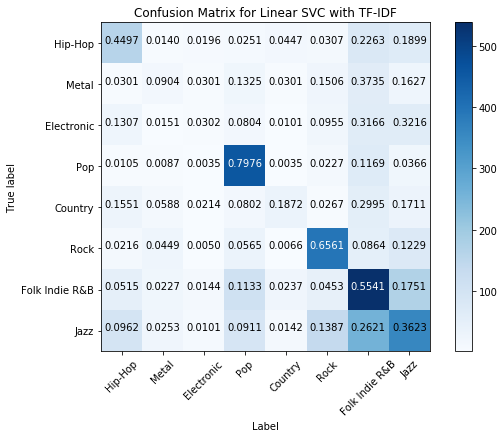

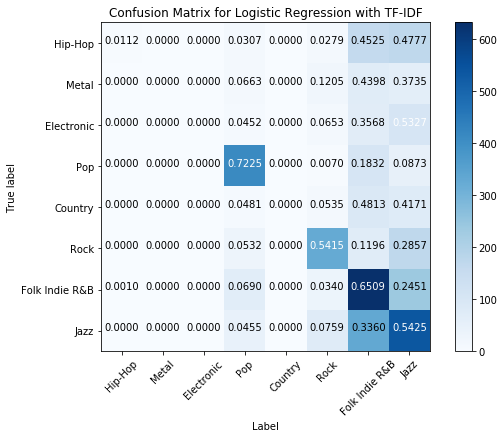

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

genre_labels=["Hip-Hop", "Metal", "Electronic", "Pop", "Country", "Rock" , "Folk Indie R&B", "Jazz"]

def plot_confusion_matrix(cm,
                          target_names,
                          modelname,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Label')
    if modelname=='Linear SVC':
      plt.title('Confusion Matrix for Linear SVC with TF-IDF')
    elif modelname=='Logistic Regression':
      plt.title('Confusion Matrix for Logistic Regression with TF-IDF')
    plt.show()

#Confusion Matrix for Linear SVC with TF-IDF
cm_lsvc = confusion_matrix(y_valid, y_valid_pred_lsvc)
plot_confusion_matrix(cm_lsvc, genre_labels, 'Linear SVC')

#Confusion Matrix for Logistic Regression with TF-IDF
cm_logreg = confusion_matrix(y_valid, y_valid_pred_lr)
plot_confusion_matrix(cm_logreg, genre_labels, 'Logistic Regression')